In [18]:
from astropy.table import Table
from dendrocat import RadioSource
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import sys
import importlib
from astropy.wcs import WCS
from scipy import interpolate
import pandas as pd
import sympy as syp
from astropy import units as u
import radio_beam
from astropy.table import Table
from radio_beam import Beam
from astropy import coordinates
from astropy import wcs
from astropy.nddata.utils import Cutout2D
from astropy.io import ascii
from matplotlib.patches import Rectangle, Ellipse

W51 = '/orange/adamginsburg/w51/TaehwaYoo/'
W51b6 = '/orange/adamginsburg/w51/TaehwaYoo/2015.1.01596.S_W51_B6_LB/continuum_images/'
W51cont='/orange/adamginsburg/w51/TaehwaYoo/b6contfits/'
w51e2_b6_briggs=W51cont+'W51e2_cont_bigbriggs.image.fits'
w51e2_b6_robust0=W51cont+'W51e2_cont_big_robust0.image.fits'
w51e2_b6_uniform=W51cont+'W51e2_cont_biguniform.image.fits'
w51e2_b6_superuniform=W51cont+'W51e2_cont_bigsuperuniform.image.fits'

w51n_b6_briggs = W51cont+'W51n_cont_bigbriggs.image.fits'
w51n_b6_robust0 = W51cont+'w51n_cont_big_robust0.image.fits'
w51n_b6_uniform = W51cont+'W51n_cont_biguniform.image.fits'
w51n_b6_superuniform = W51cont+'W51n_cont_bigsuperuniform.image.fits'
w51n_b6_natural = W51cont+'W51n_cont_bignatural.image.fits'

W51b3 = '/orange/adamginsburg/w51/TaehwaYoo/2017.1.00293.S_W51_B3_LB/may2021_successful_imaging/'

w51n_b3_tt0 = W51b3+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51n_b3_tt1 = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51n_b3_alpha = W51+'w51n.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51conv = '/orange/adamginsburg/w51/TaehwaYoo/convolved_new/'
w51n_b6_conv = w51conv + 'w51n_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b3_tt0 = W51b3+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'
w51e2_b3_tt1 = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt1.pbcor.fits'
w51e2_b3_alpha = W51+'w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.alpha.pbcor.fits'

w51e2_b6_conv = w51conv + 'w51e2_cont_bigbriggs.image.convB3_briggs.fits'

w51e_b6_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B6_conv.fits'
w51e_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51e_B3_conv.fits'


w51n_b3_almaimf_conv = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/w51n_B3_conv.fits'

w51n_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B3_uid___A001_X1296_X18f_continuum_merged_12M_robust0_selfcal4_finaliter.image.tt0.pbcor.fits'
w51n_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-IRS2_B6_uid___A001_X1296_X187_continuum_merged_12M_robust0_selfcal9_finaliter.image.tt0.pbcor.fits'
w51e_b3_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'
w51e_b6_almaimf = '/orange/adamginsburg/w51/TaehwaYoo/w51_alma_imf/W51-E_B6_uid___A001_X1296_X213_continuum_merged_12M_robust0_selfcal7_finaliter.image.tt0.pbcor.fits'


w51n_b6_conv_briggs = w51conv + 'w51n_briggs_B6_conv.fits'
w51n_b6_conv_robust0 = w51conv + 'w51n_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51n_superuniform_B6_conv.fits'

w51e_b6_conv_briggs = w51conv + 'w51e_briggs_B6_conv.fits'
w51e_b6_conv_robust0 = w51conv + 'w51e_robust0_B6_conv.fits'
w51n_b6_conv_superuniform = w51conv + 'w51e_superuniform_B6_conv.fits'
#----------

#w51e_b3_tt0 = '/Users/dbahck37/W51data/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal7.image.tt0.pbcor.fits'

#w51e_b6_conv_briggs ='/Users/dbahck37/W51data/convolved_new/w51e_briggs_B6_conv.fits'

catalogdir = '/orange/adamginsburg/ALMA_IMF/catalogs/getsf-smoothed/'
cat_w51e = catalogdir + 'W51-E-getsf.cat'
cat_w51n = catalogdir + 'W51-IRS2-getsf.cat'

w51e_b6_sb = '/orange/adamginsburg/w51/TaehwaYoo/w51_b6_imaging_2023/w51e2.spw0thru19.14500.robust0.thr0.075mJy.mfs.I.startmod.selfcal1.image.tt0.fits'



In [40]:
plt.rcParams['axes.labelsize']=80
plt.rcParams['xtick.labelsize']=40
plt.rcParams['ytick.labelsize']=40
plt.rcParams['axes.titlesize']=80
plt.style.use('dark_background')
from matplotlib import colors

def display_image(fitsfile, skylim1, skylim2, vmin=-0.0001, vmax=0.002,issqrt=False ):
    fitsdata = fits.open(fitsfile)
    image = fitsdata[0].data
    if len(image.shape)>2:
        image = fitsdata[0].data[0][0]

    hdrNB = fits.getheader(fitsfile)  
    wcsNB = WCS(hdrNB,naxis=2)
    fig = plt.figure(figsize=(30,30))
    ax1 = fig.add_axes([0.1,0.1,0.9,0.9],projection=wcsNB)
    if not issqrt:
        ax1.imshow(image, origin='lower',cmap=plt.get_cmap('inferno'),vmin=vmin,vmax=vmax)
    else:
        ax1.imshow(image, origin='lower',cmap=plt.get_cmap('inferno'),norm=colors.PowerNorm(gamma=0.5,vmin=vmin,vmax=vmax))

    pix1 = wcsNB.world_to_pixel(skylim1)
    pix2 = wcsNB.world_to_pixel(skylim2)
    
    ax1.set_xlim(pix1[0],pix2[0])
    ax1.set_ylim(pix1[1],pix2[1])
    
    ax1.set_xlabel('RA')
    ax1.set_ylabel('DEC')
    
    return ax1
    
def plot_catalog_on_image(ax,hdrNB,catdatadir,isb3=True,beam=None,use_criteria=True, 
                          label=None,color='cyan',lw=2,aperture='fwhm+beam',xysource=None):
    catdata = ascii.read(catdatadir,data_start=0,format='commented_header', header_start=120,  comment="!")
    sky_ra = catdata['WCS_ACOOR']
    sky_dec = catdata['WCS_DCOOR']
    no = catdata['NO']
    if isb3:
        bandlabel = '03'
    else:
        bandlabel = '02'
    fooa = catdata['FOOA%s'%bandlabel]
    foob = catdata['FOOB%s'%bandlabel]
    theta = catdata['THETA%s'%bandlabel]
    afwhm = catdata['AFWHM%s'%bandlabel]
    bfwhm = catdata['BFWHM%s'%bandlabel]
   
    if use_criteria and label is None:
        
        rec_ind = np.where((np.abs(catdata['GOODM%s'%bandlabel])>1)&
                   (np.abs(catdata['SIGNM%s'%bandlabel])>1)&
                   (catdata['FXP_BST%s'%bandlabel]/catdata['FXP_ERR%s'%bandlabel]>2)&
                   (catdata['FXT_BST%s'%bandlabel]/catdata['FXT_ERR%s'%bandlabel]>2)&
                   (catdata['AFWHM%s'%bandlabel]/catdata['BFWHM%s'%bandlabel]<2)&
                   (catdata['FOOA%s'%bandlabel]/catdata['AFWHM%s'%bandlabel]>1.15))[0]
        """
        rec_ind = np.where((np.abs(catdata['GOODM03'])>1)&
                   (np.abs(catdata['SIGNM03'])>1)&
                   (catdata['FXP_BST03']/catdata['FXP_ERR03']>2)&
                   (catdata['FXT_BST03']/catdata['FXT_ERR03']>2)&
                   (catdata['AFWHM03']/catdata['BFWHM03']<2)&
                   (catdata['FOOA03']/catdata['AFWHM03']>1.15) &
                   (np.abs(catdata['GOODM02'])>1) &
                   (np.abs(catdata['SIGNM02'])>1)&
                   (catdata['FXP_BST02']/catdata['FXP_ERR02']>2)&
                   (catdata['FXT_BST02']/catdata['FXT_ERR02']>2)&
                   (catdata['AFWHM02']/catdata['BFWHM02']<2)&
                   (catdata['FOOA02']/catdata['AFWHM02']>1.15))[0]
        """
        print('rec_ind',rec_ind)
        sky_ra= sky_ra[rec_ind]
        sky_dec = sky_dec[rec_ind]
        fooa = fooa[rec_ind]
        foob = foob[rec_ind]
        theta = theta[rec_ind]
        no = no[rec_ind]
        afwhm = afwhm[rec_ind]
        bfwhm = bfwhm[rec_ind]
        
    
    if label is not None:
        label = [i-1 for i in label]
        sky_ra= sky_ra[label]
        sky_dec = sky_dec[label]
        fooa = fooa[label]
        foob = foob[label]
        theta = theta[label]
        no = no[label]
        afwhm = afwhm[label]
        bfwhm = bfwhm[label]

    skypos = np.vstack((sky_ra,sky_dec)).T

    
    wcsNB = WCS(hdrNB,naxis=2)
    scaleNB = wcsNB.proj_plane_pixel_scales()[0]
    beamNB = Beam.from_fits_header(hdrNB)

    xypos = wcsNB.wcs_world2pix(skypos,0)
    xpos = xypos[:,0]
    ypos = xypos[:,1]
    
    
        
    indexlist = []
    print(xysource)
    for i in range(len(xypos)):
        if aperture is 'footprint':
            major = fooa[i]/3600/scaleNB.value
            minor = foob[i]/3600/scaleNB.value
            pa = 180-theta[i]
        elif aperture is 'fwhm+beam':
            meanbeamsize = (beam.major.value+beam.minor.value)/4
            major = (afwhm[i]/3600+meanbeamsize)/scaleNB.value
            minor = (bfwhm[i]/3600+meanbeamsize)/scaleNB.value
            pa = 180-theta[i]
        elif aperture is 'beam':
            major = beam.major.value/scaleNB.value
            minor = beam.minor.value/scaleNB.value
            pa = 180-beam.pa.value

        ellipse = Ellipse(xypos[i],width=major,height=minor,facecolor='none',
                          angle=180-pa,edgecolor=color,lw=lw)
        
        ax.add_patch(ellipse)
        if xysource is not None:
            numsource, indsource = count_points_in_ellipse(xpos[i],ypos[i],major,minor,pa,xysource[:,0],xysource[:,1])
            
            print(no[i],xpos[i],ypos[i],major, minor,pa,numsource)

            ax.text(xpos[i]+10,ypos[i]+10,'%d'%numsource,color='w',fontsize=30,clip_on=True)
            indexlist.append(indsource)
    if xysource is not None:
        return indexlist
    

In [ ]:

fitsdata = fits.open(w51e2_b6_briggs)
hdrNB = fits.getheader(w51e2_b6_briggs)  
wcsNB = WCS(hdrNB,naxis=2)
skylim1 = wcsNB.pixel_to_world(5400,5600)
skylim2 = wcsNB.pixel_to_world(6500,6500)
    
display_image(w51e2_b6_briggs, skylim1,skylim2, vmin=-0.0004,vmax=0.005)    
plt.savefig('w51e2_lbonly.png')


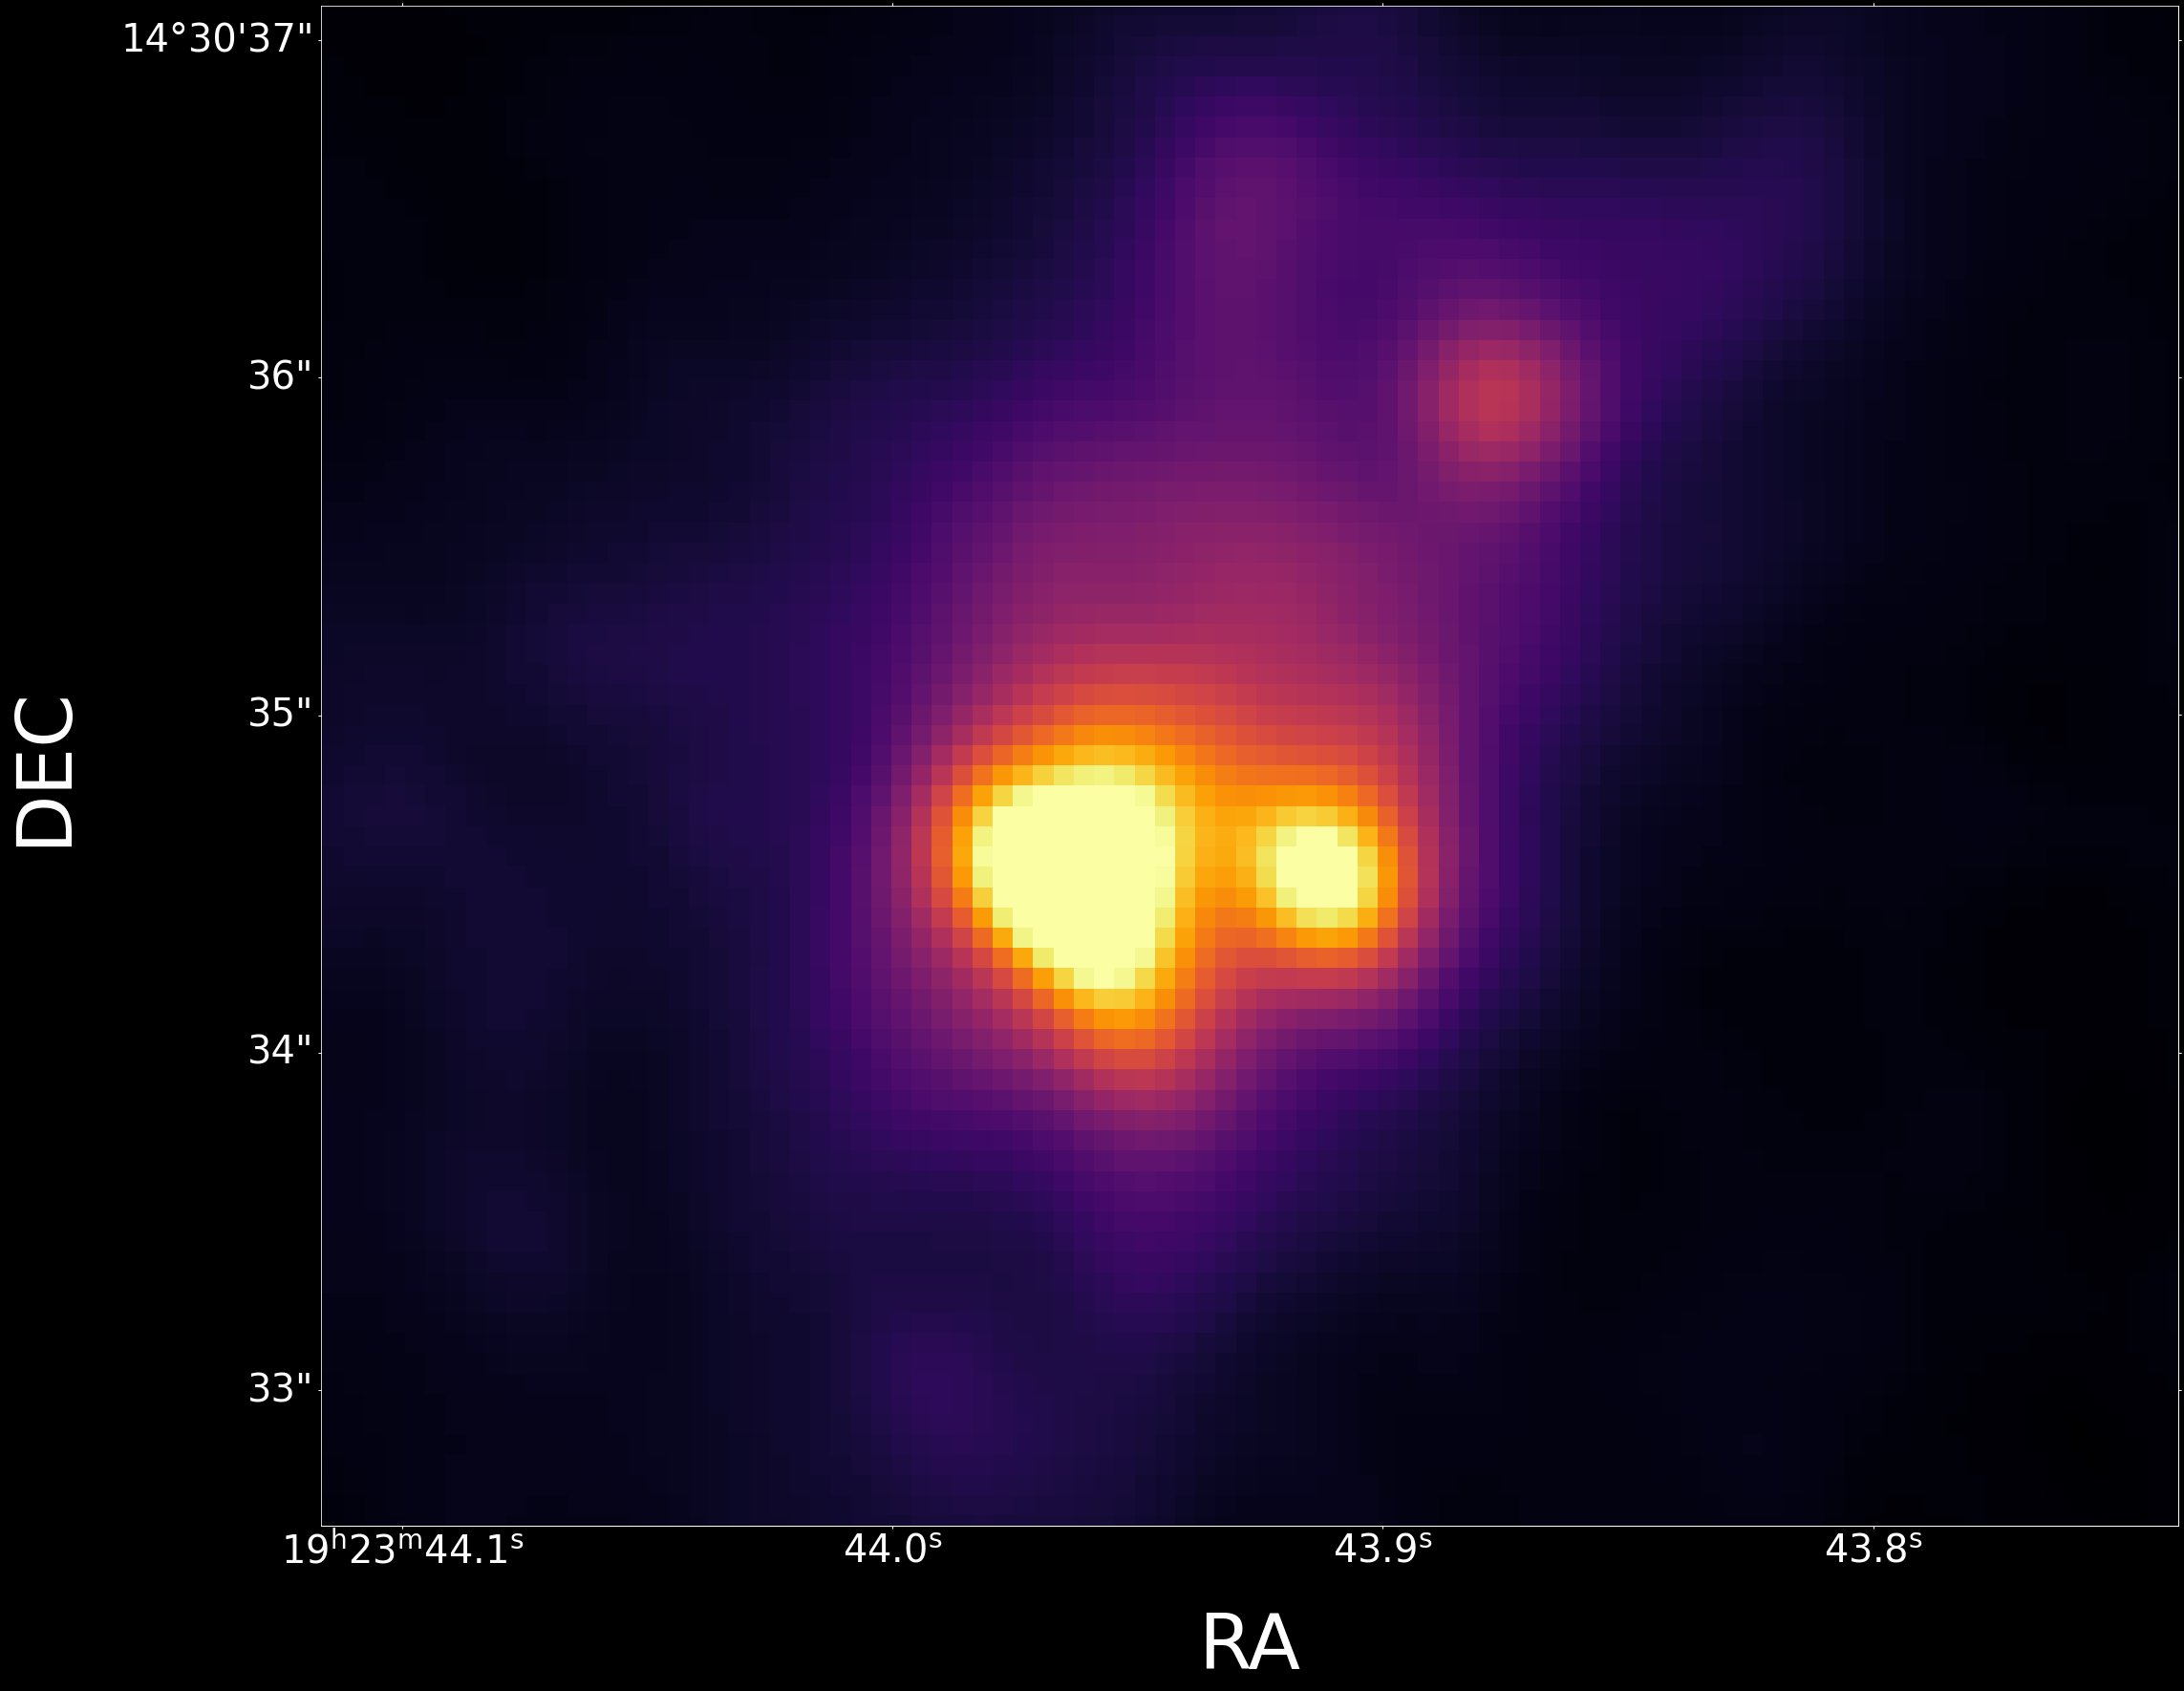

In [29]:
display_image(w51e_b6_almaimf, skylim1,skylim2, vmin=-0.0004,vmax=0.28)    
plt.savefig('w51e2_almaimf.png')

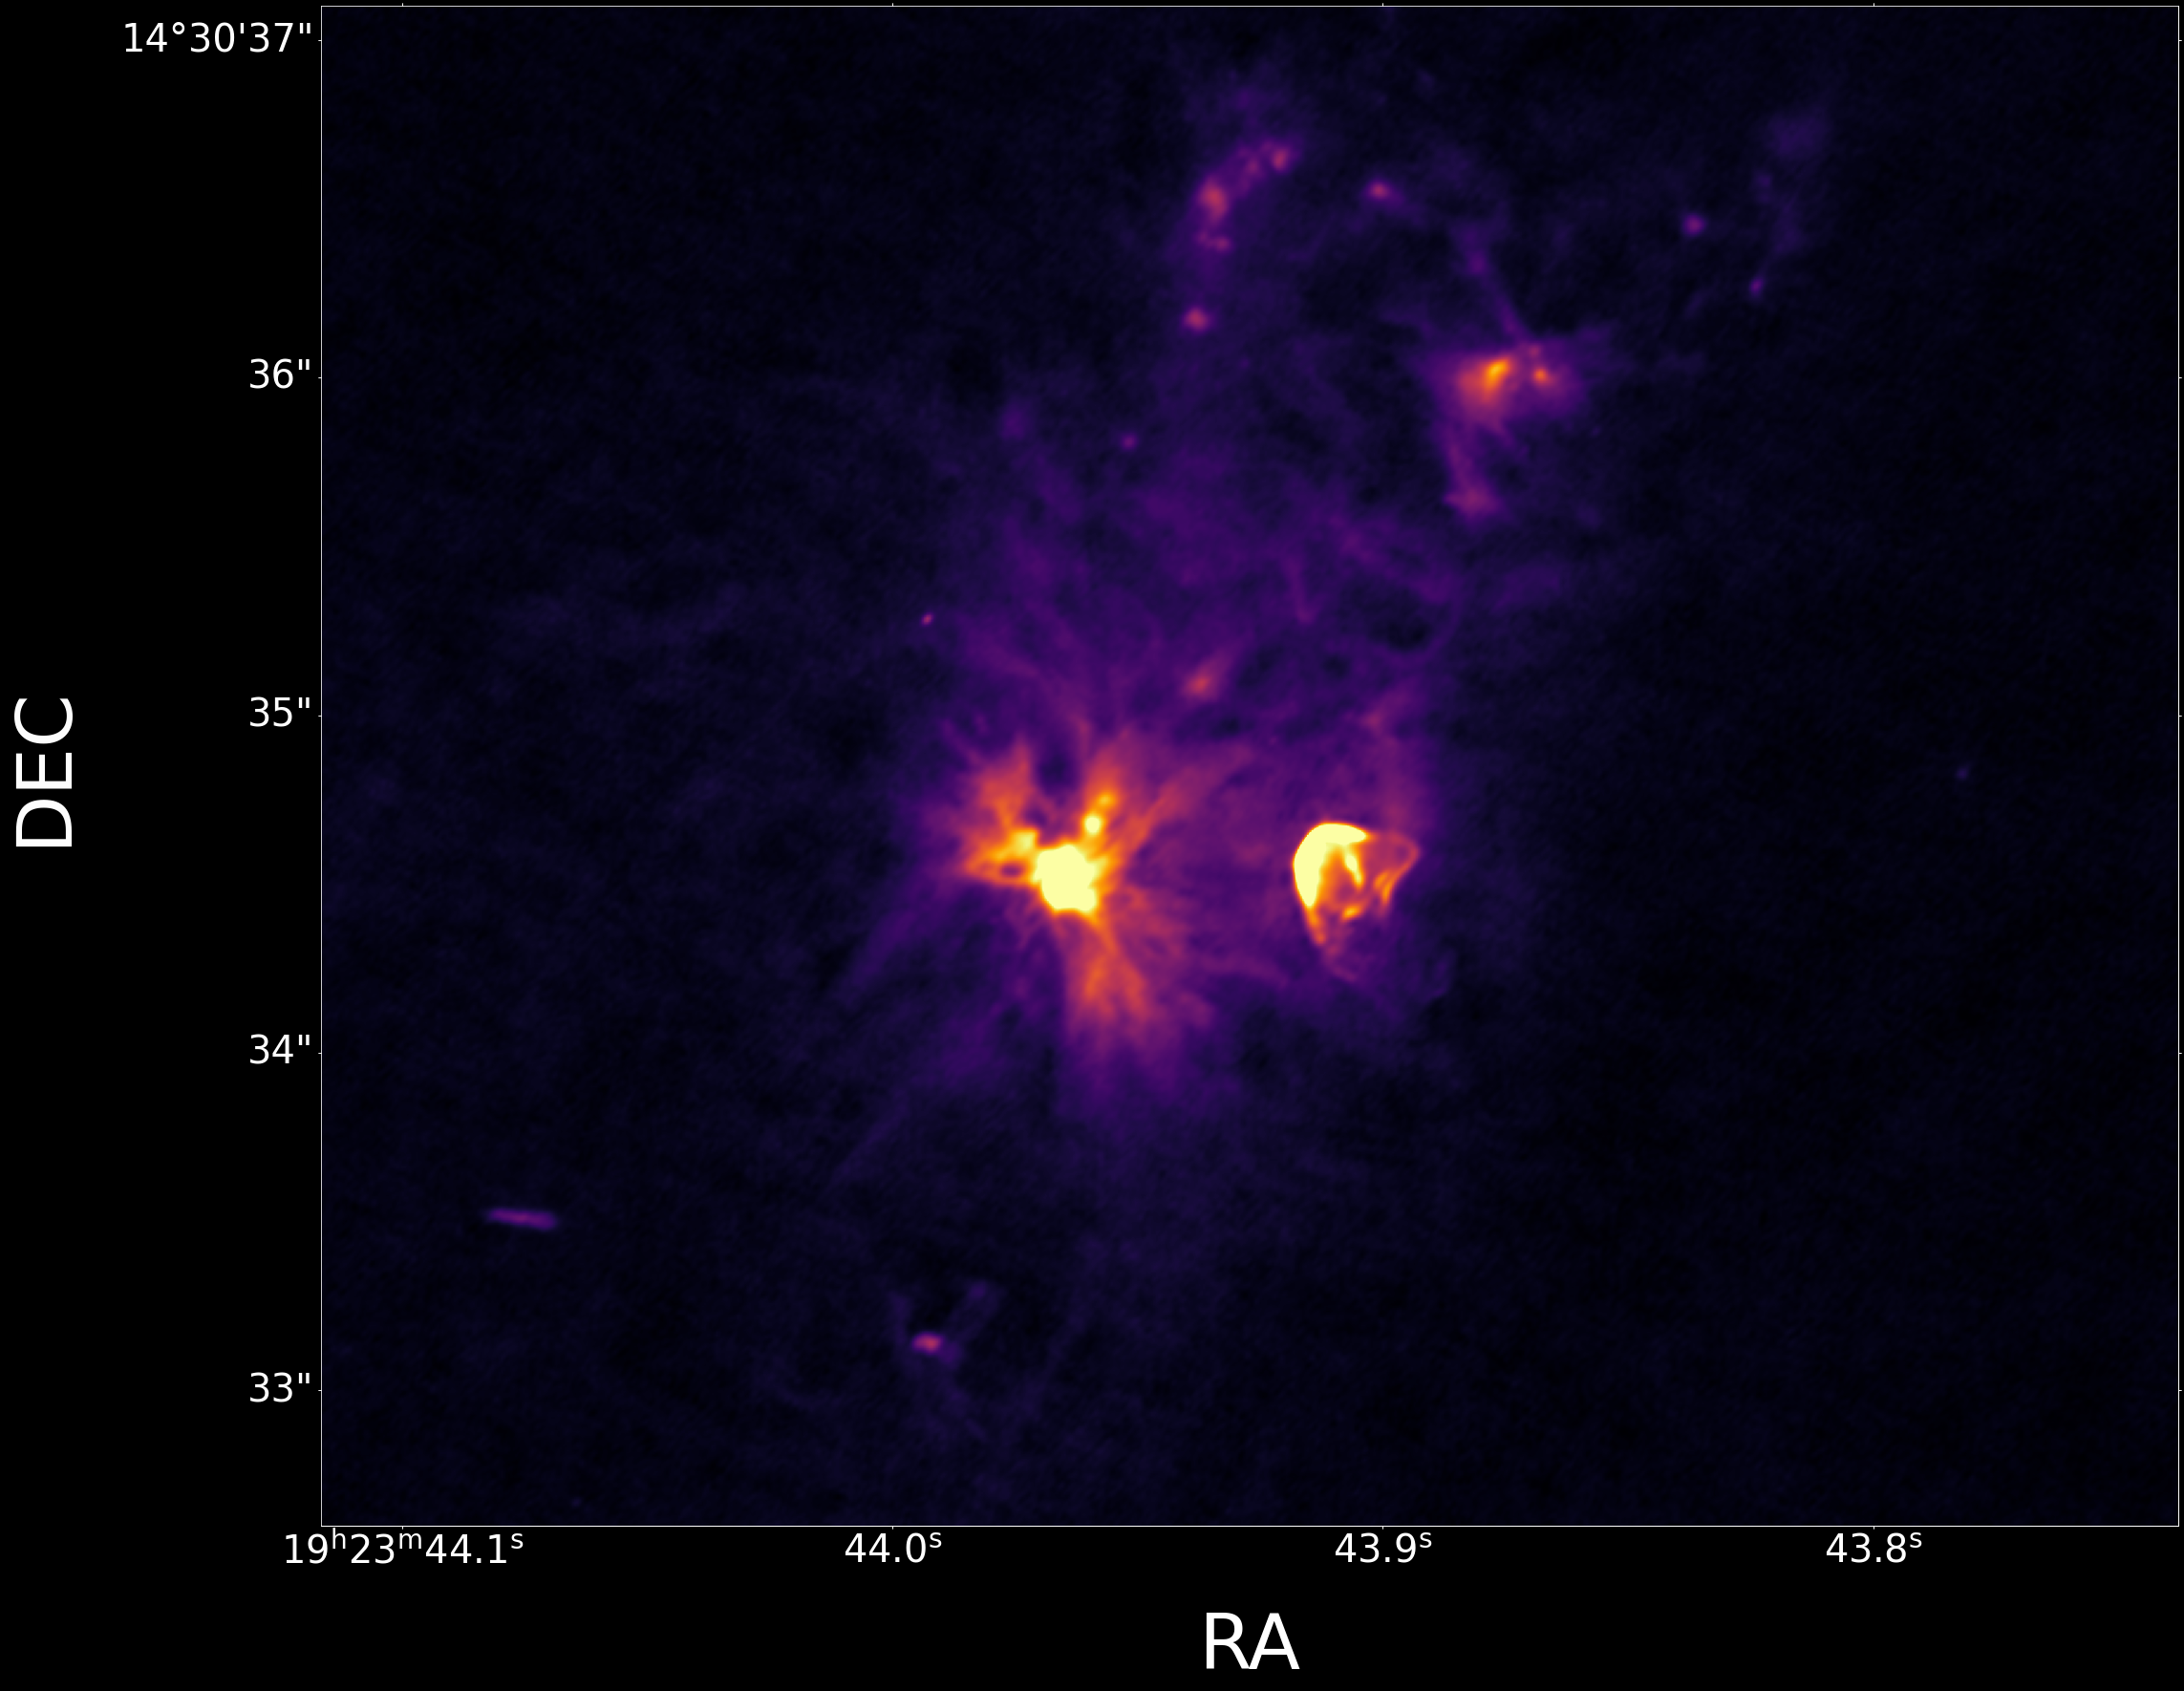

In [30]:
display_image(w51e_b6_sb , skylim1,skylim2, vmin=-0.0001,vmax=0.005)    
plt.savefig('w51e2_lbsb.png')

rec_ind [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 16 17 18 20 28 29 31 35 55 57
 82]
None


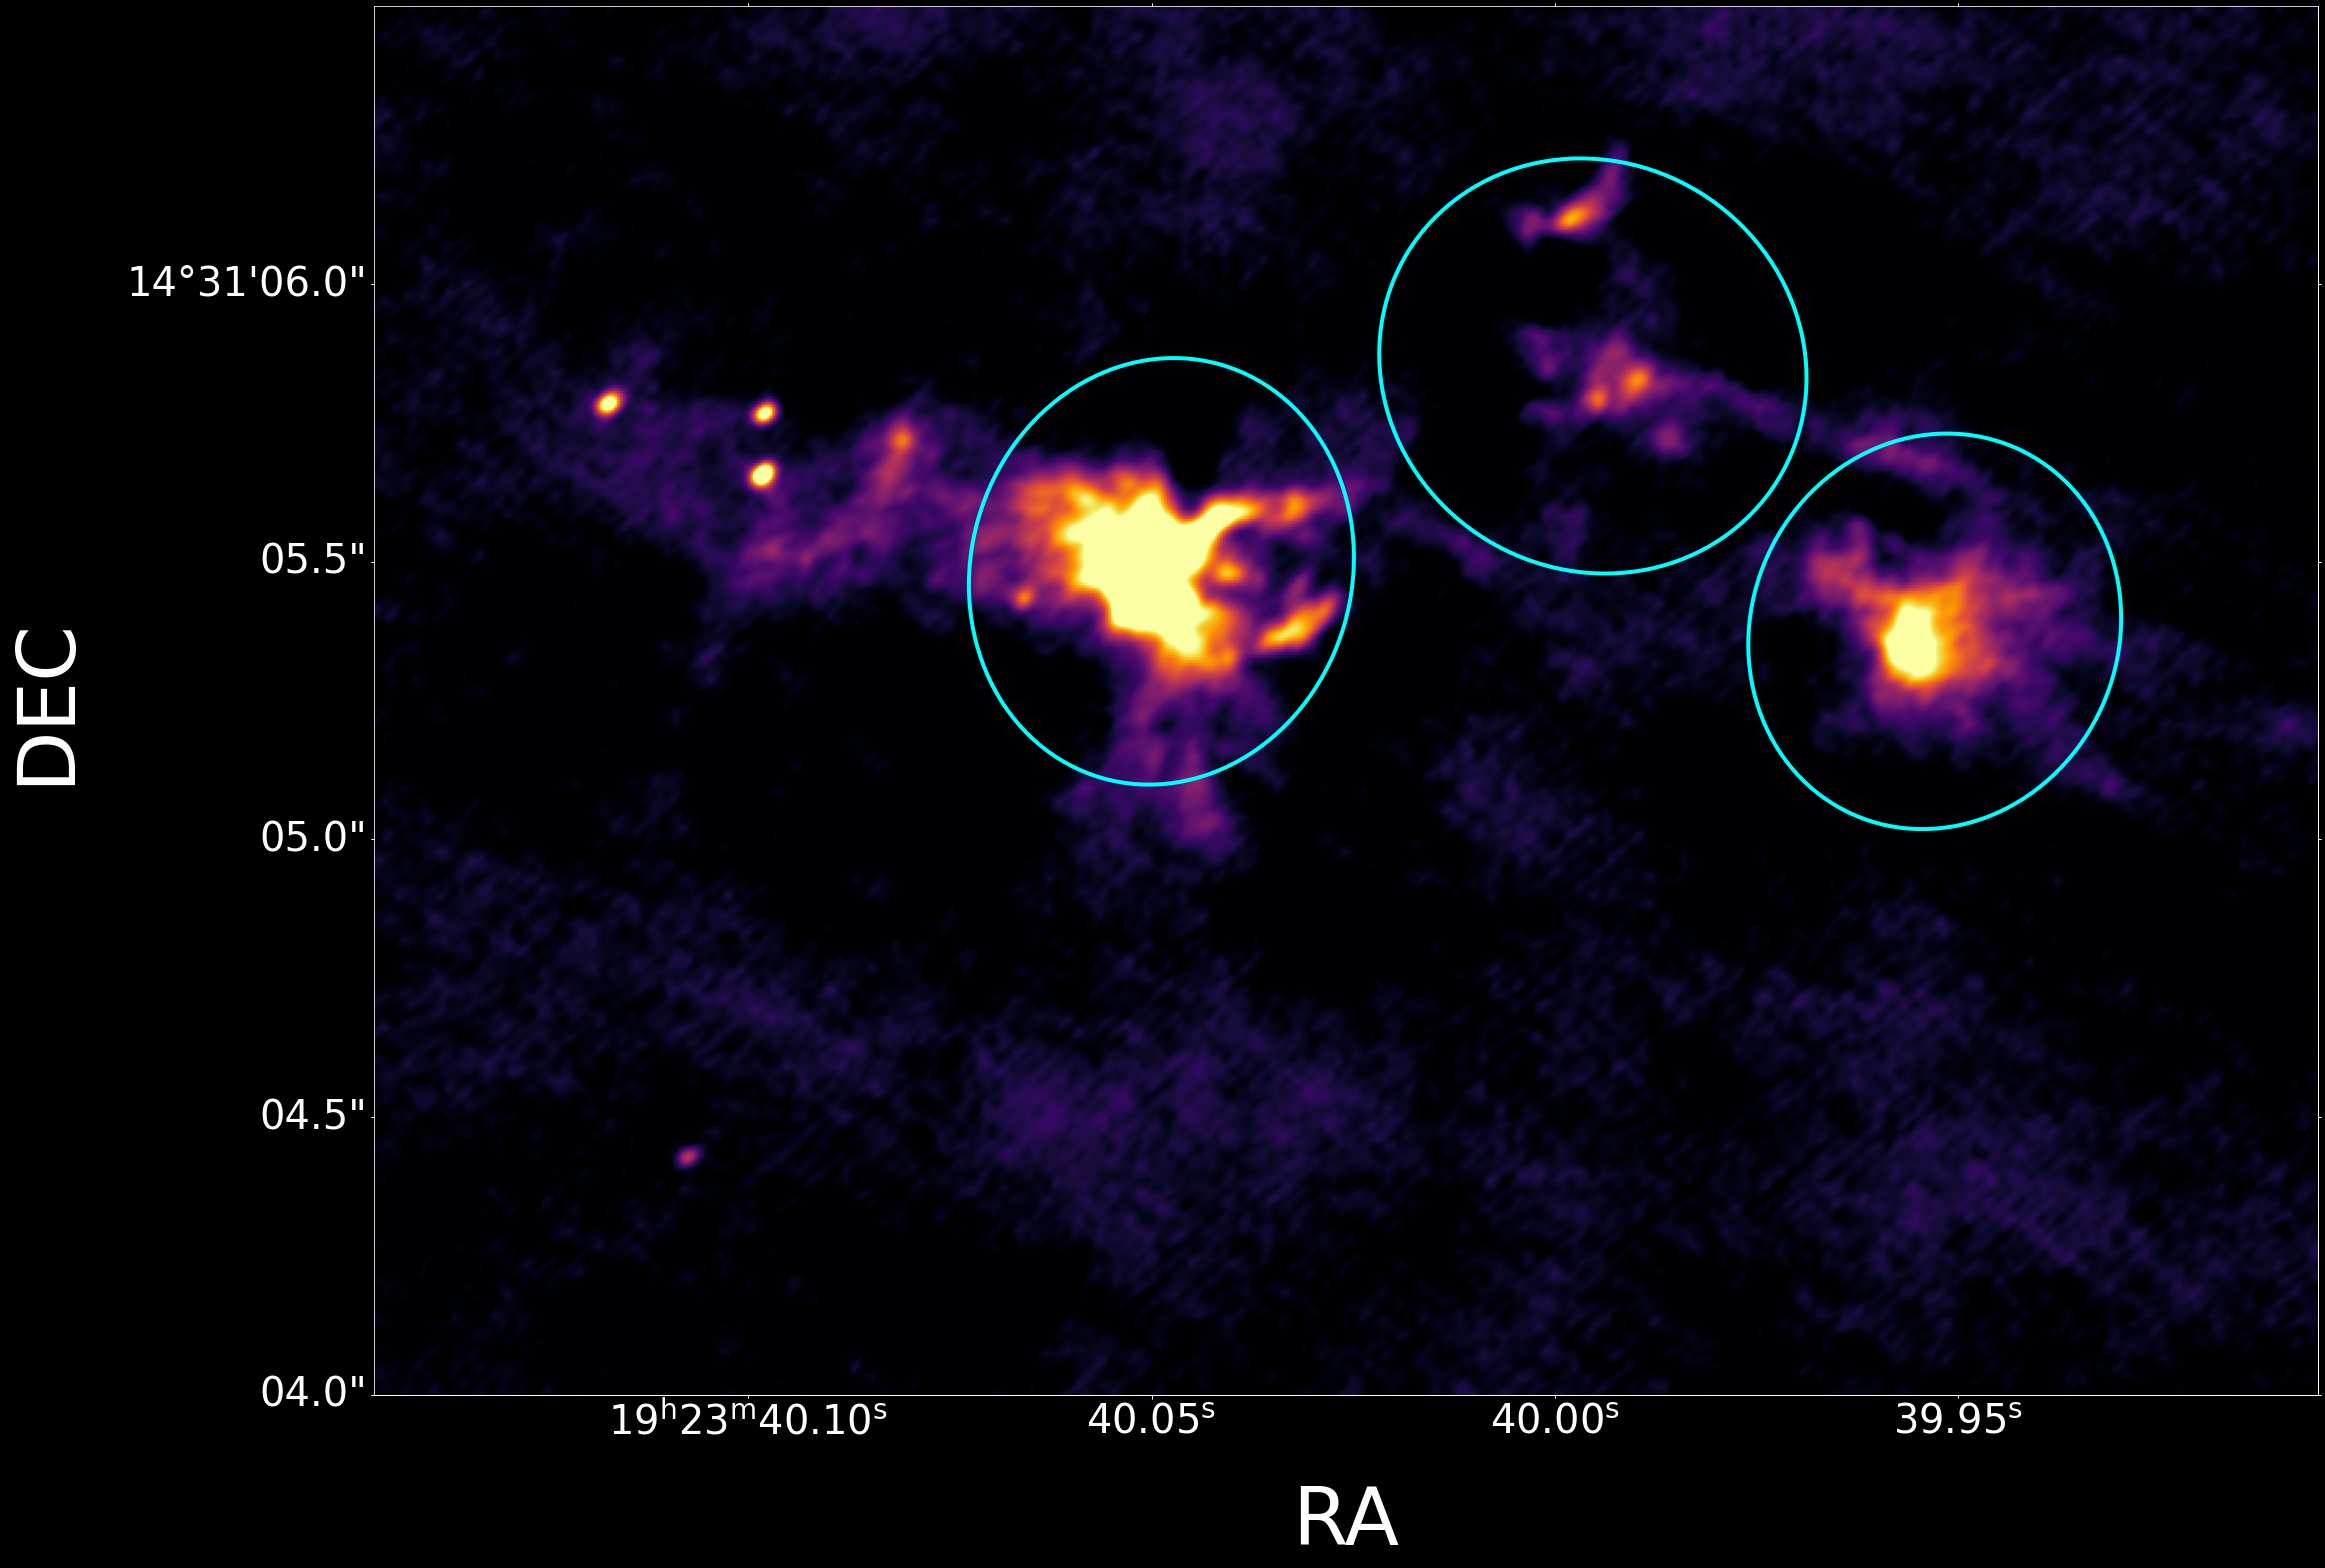

In [42]:



fitsdata = fits.open(w51n_b6_briggs)
hdrNB = fits.getheader(w51n_b6_briggs)  
wcsNB = WCS(hdrNB,naxis=2)
skylim1 = wcsNB.pixel_to_world(5720,5700)
skylim2 = wcsNB.pixel_to_world(6420,6200)

ax1 = display_image(w51n_b6_briggs , skylim1,skylim2, vmin=-0.0001,vmax=0.005)

catalog = Table.read('/home/t.yoo/w51/catalogue/spectral_index/w51n_combined_catalog.fits',format='fits')
hdrNBalmaimf = fits.getheader(w51n_b3_almaimf)  
wcsNBalmaimf = WCS(hdrNBalmaimf,naxis=2)
beamalmaimf = Beam.from_fits_header(hdrNBalmaimf)    

plot_catalog_on_image(ax1,hdrNB,cat_w51n,isb3=True,beam=beamalmaimf,use_criteria=True,lw=4)


plt.savefig('w51n_hr.png')

rec_ind [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 16 17 18 20 28 29 31 35 55 57
 82]
None


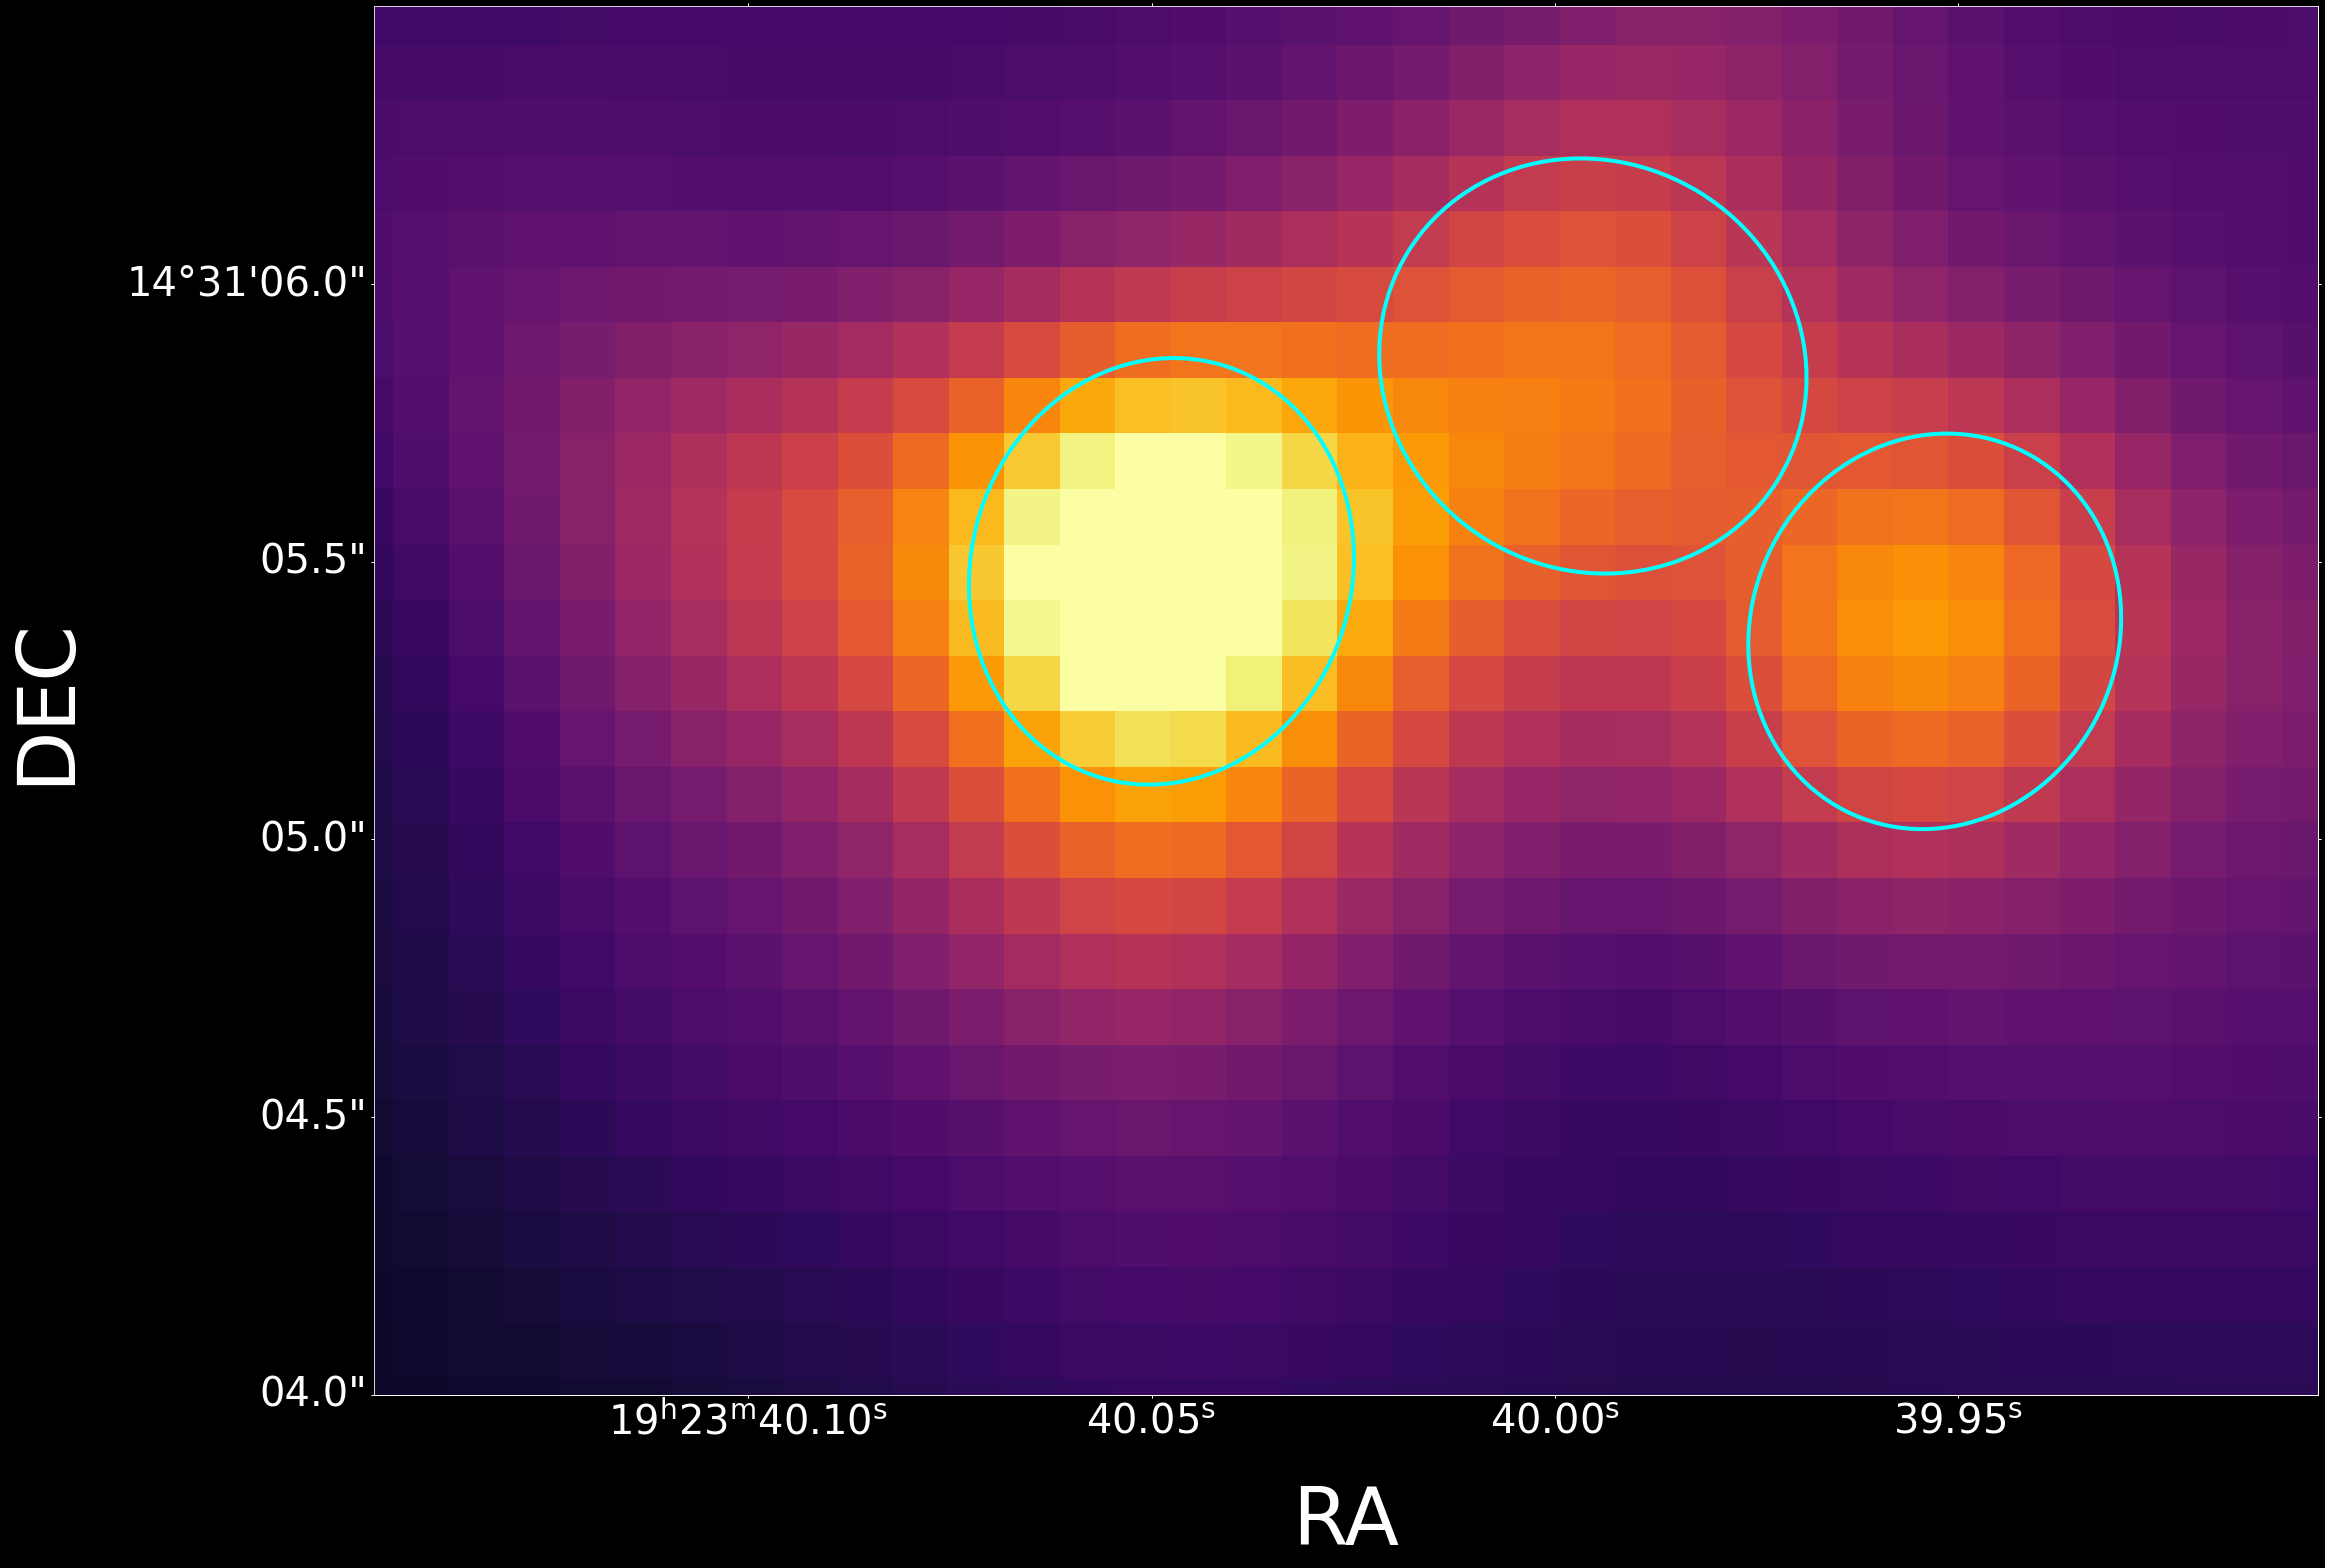

In [44]:
ax1 = display_image(w51n_b6_almaimf , skylim1,skylim2, vmin=-0.0001,vmax=0.66,issqrt=True)
hdrNB = fits.getheader(w51n_b6_almaimf)  

plot_catalog_on_image(ax1,hdrNB,cat_w51n,isb3=True,beam=beamalmaimf,use_criteria=True,lw=4)

plt.savefig('w51n_almaimf.png')